# EasyCOBRA

EasyCOBRA is a Python package we developed that provides numerous methods for analyzing and modifying metabolic networks, while being more user-friendly. It consists of two components: `EasyCobraModifier` and `EasyCobraAnalyzer`.

## EasyCobraModifier

In [1]:
import sys
sys.path.append(r'C:\Users\86150\i_learn_python')

from EasyCOBRA import EasyCobraModifier

-
First, load your own model

In [2]:
Modifier = EasyCobraModifier("./DGF298.json")

### Search

-
Find reactions corresponding to a gene name using `get_reactions_by_gene_name`. The result is a list of tuples, each containing the `reaction_id` and `reaction_name`.

In [3]:
reactions_info = Modifier.get_reactions_by_gene_name("nuoF")
print(reactions_info)

[('NADH16pp', 'NADH dehydrogenase (ubiquinone-8 & 3 protons) (periplasm)'), ('NADH17pp', 'NADH dehydrogenase (menaquinone-8 & 3 protons) (periplasm)'), ('NADH18pp', 'NADH dehydrogenase (demethylmenaquinone-8 & 3 protons) (periplasm)')]


-
Find reactions corresponding to a gene name using `get_reactions_by_gene_id`. The result is a list of tuples, each containing the `reaction_id` and `reaction_name`.

In [4]:
reactions_info = Modifier.get_reactions_by_gene_id("b4025")
print(reactions_info)

[('PGI', 'Glucose-6-phosphate isomerase')]


-
Find reactions involving metabolites using `get_reactions_by_metabolite`.

In [5]:
reactions_ids = Modifier.get_reactions_by_metabolite("icit_c")
print(reactions_ids)

['ACONTb', 'ICDHyr', 'ICL']


### Check

-
You can use `check_metabolites_exist`, `check_reactions_exist`, and `check_genes_exist` to check if a metabolite, reaction, or gene exists in the model.

In [6]:
Modifier.check_metabolites_exist(["icit_c"])

[True]

In [7]:
Modifier.check_reactions_exist(["PGI","abc"])

[True, False]

In [8]:
Modifier.check_genes_exist(["nuoF","abc"])

[True, False]

-
You can use `check_balance` to check if the specified reaction ID corresponds to a balanced reaction, meaning the total number of atoms before and after the reaction is consistent.

In [9]:
Modifier.check_balance("PGI")

Reactants:
g6p_c: C6H11O9P

Products:
f6p_c: C6H11O9P

Total atoms in reactants:
C: -6.0
H: -11.0
O: -9.0
P: -1.0

Total atoms in products:
C: -6.0
H: -11.0
O: -9.0
P: -1.0

The reaction is balanced.


### Modify the metabolic network


Define reactions and the associated metabolites, and add the corresponding reactions to the metabolic network model. Note that you can specify the type of metabolites, which includes 'sink', 'source', 'exchange', 'demand', 'production', 'transport'; the specific meanings can be found in the official documentation of COBRApy.

In [10]:
reactions = [
    {
        "id": "my_NADPH_Dehydrogenase",
        "name": "NADPH Dependent Dehydrogenase",
        "stoichiometry": {
            "aacoa_c": -1,
            "nadph_c": -1,
            "hbcoa_c": 1,
            "nadp_c": 1
        },
    }
]

metabolites = [
    {
        "id": "aacoa_c",
        "formula": "C23H32O17",
        "name": "Acetyl-CoA",
        "compartment": "c",
        "type":""
    },
    {
        "id": "nadph_c",
        "formula": "C21H29N7O17P3",
        "name": "NADPH",
        "compartment": "c",
        "type":""
    },
    {
        "id": "hbcoa_c",
        "formula": "C22H30O16",
        "name": "HB-CoA",  # Change to appropriate name if necessary
        "compartment": "c",
        "type": ""
    },
    # Add more metabolites as needed
]


# Add pathway and save model
Modifier.add_pathway(reactions, metabolites)
Modifier.check_reactions_exist(["my_NADPH_Dehydrogenase"])

[True]

-
To delete a specified reaction, you can use `remove_reaction`.

In [11]:
Modifier.remove_reaction("my_NADPH_Dehydrogenase")
Modifier.check_reactions_exist(["my_NADPH_Dehydrogenase"])

Reaction 'my_NADPH_Dehydrogenase' removed successfully.


[False]

-
After modifying the model, you can use `save_model` to save it.

In [12]:
Modifier.save_model("./mymodel.json")

## EasyCobraAnalyzer

### Single-objective, Multi-objective Optimization and Visualization


EasyCobraAnalyzer provides a range of methods for performing flux balance analysis on metabolic networks, including both single-objective and multi-objective optimization.








In [13]:
from EasyCOBRA import EasyCobraAnalyzer

-
The `perform_optimization` method in EasyCobraAnalyzer is primarily used to run flux balance analysis (FBA). The `target_reactions` parameter is a list containing the target reactions. If multiple target reactions are specified, their weights must be provided to enable multi-objective optimization. The `variable_reactions` parameter specifies the conditions for running FBA. For example, `variable_reactions=['EX_glc__D_e']` and `variable_ranges=[(0, 21, 1)]` indicate that the maximum values of `target_reactions` will be calculated under conditions where glucose ranges from 0 to 21 (with a step size of 1), and the result will be returned as an array. If two `variable_reactions` are provided, a two-dimensional array will be returned.

In [14]:
analyzer = EasyCobraAnalyzer("./DGF298_core-PHB-8_16.json")
result = analyzer.perform_optimization(
    target_reactions=['PHB_Synthesis'],
    variable_reactions=['EX_glc__D_e'],
    variable_ranges=[(0, 21, 1)]
)
glucose_range = result['variable_ranges'][0]
phb_fluxes = result['fluxes']['PHB_Synthesis']



C:\Users\86150\AppData\Local\Programs\Python\Python311\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


-
After obtaining the array returned by `perform_optimization`, you can run the `plot_fluxes` function for visualization. If a one-dimensional array is returned, `plot_fluxes` will generate a line plot. If a two-dimensional array is returned, it will create a heatmap. Additionally, if there are multiple `target_reactions`, multiple subplots will be generated.








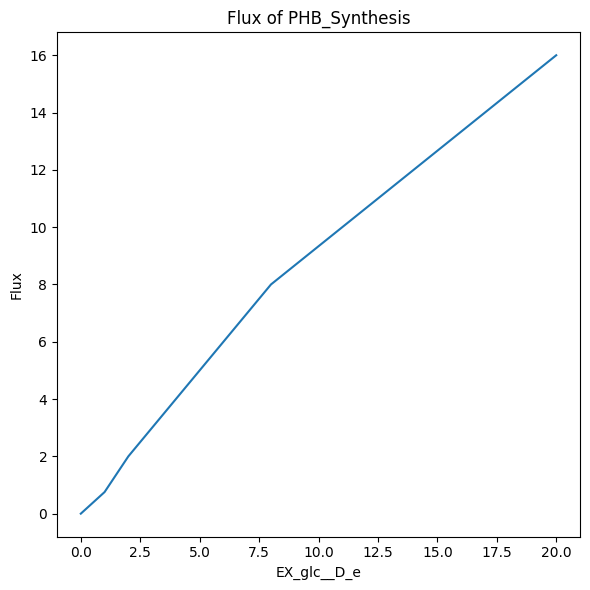

In [15]:
analyzer.plot_fluxes(result,['EX_glc__D_e'])

-
Below is the visualization of multiple target reactions and the case with two variables.

C:\Users\86150\AppData\Local\Programs\Python\Python311\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


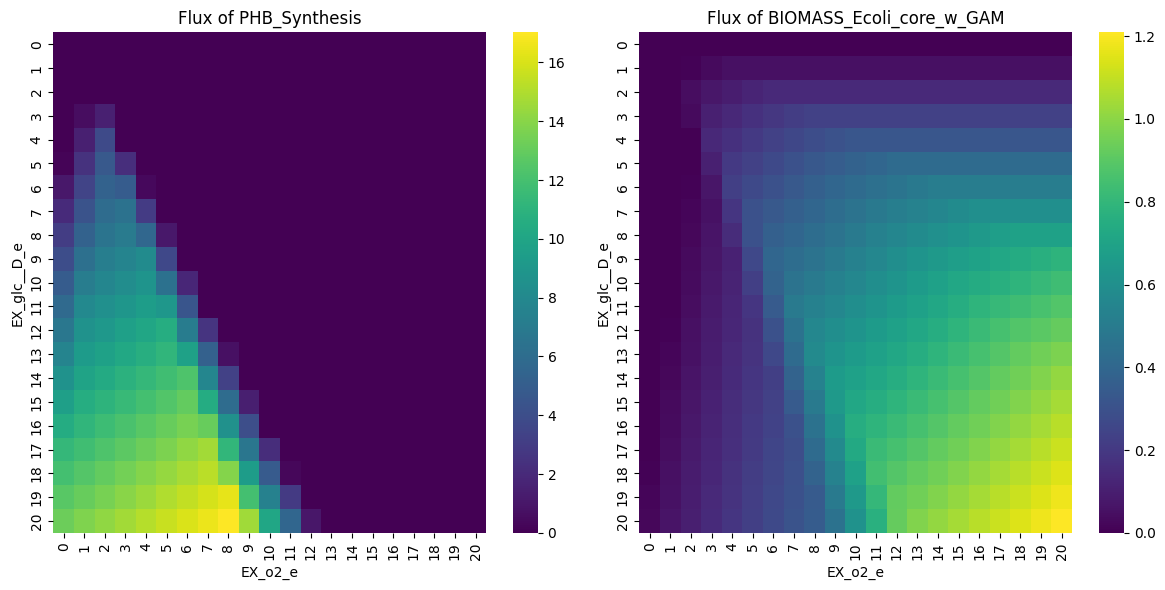

In [16]:
target_reactions = ['PHB_Synthesis', 'BIOMASS_Ecoli_core_w_GAM']
weights = [1.0, 40.0]
variable_reactions = ['EX_glc__D_e', 'EX_o2_e']
variable_ranges = [(0, 21, 1), (0, 21, 1)]

# 获取优化结果
optimization_results = analyzer.perform_optimization(
    target_reactions=target_reactions,
    weights=weights,
    variable_reactions=variable_reactions,
    variable_ranges=variable_ranges
)

analyzer.plot_fluxes(optimization_results,variable_reactions)

### Metabolic Network Visualization

The model provides `plot_metabolic_network` to visualize the metabolic network. When plotting, you can specify particular metabolites, genes, or reaction IDs. Green arrows represent metabolites involved in reactions, while red arrows represent metabolites produced by reactions.The dark blue dots represent reactions, while the light blue dots represent metabolites involved in the reactions. Hovering over the dots with the mouse reveals more information.








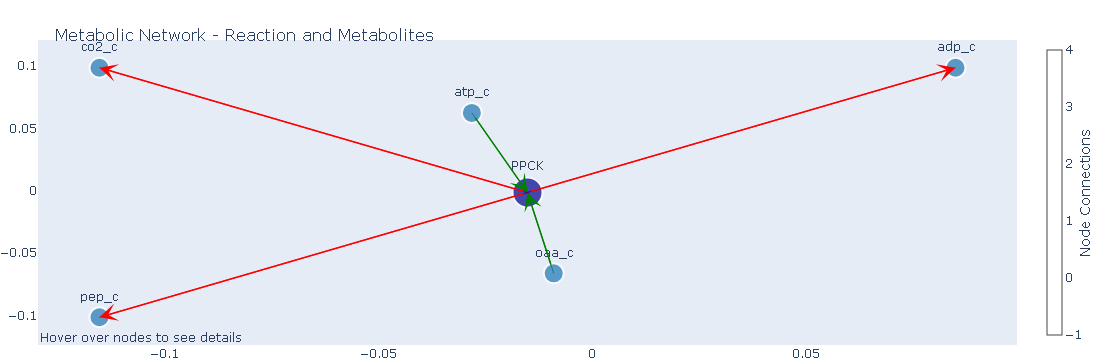

In [21]:
analyzer.plot_metabolic_network(reaction_ids=['PPCK'])

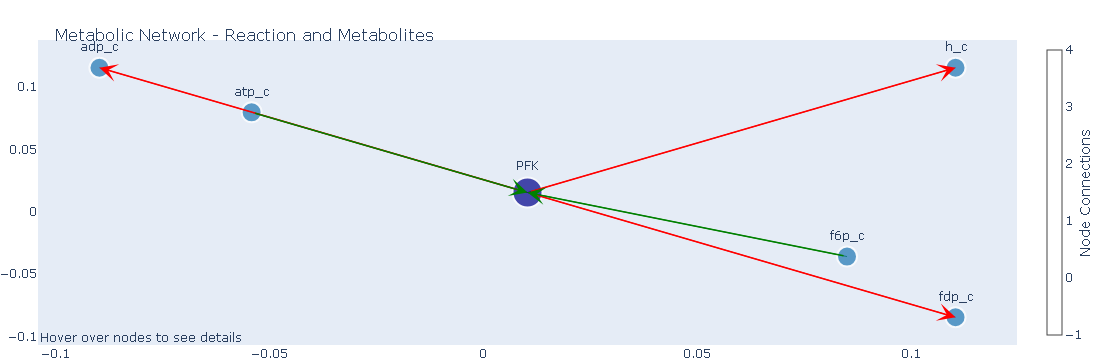

In [22]:
analyzer.plot_metabolic_network(gene_names=['pfkB'])

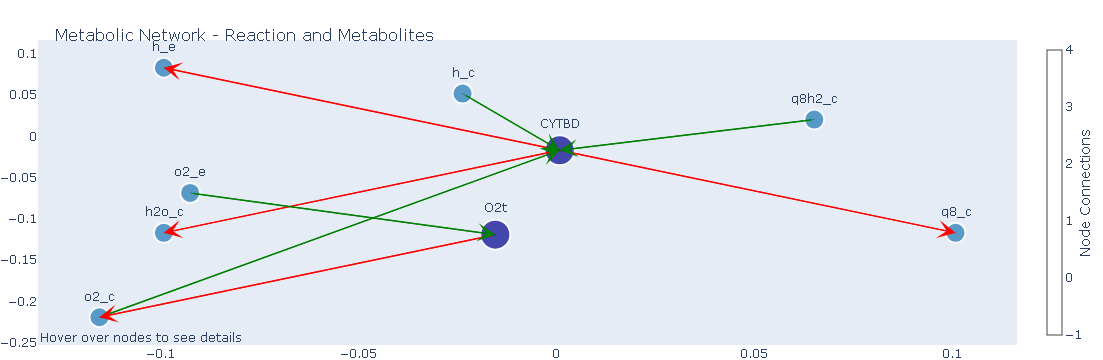

In [26]:
analyzer.plot_metabolic_network(metabolite_ids=["o2_c"])

-
These parameters can be used in combination.

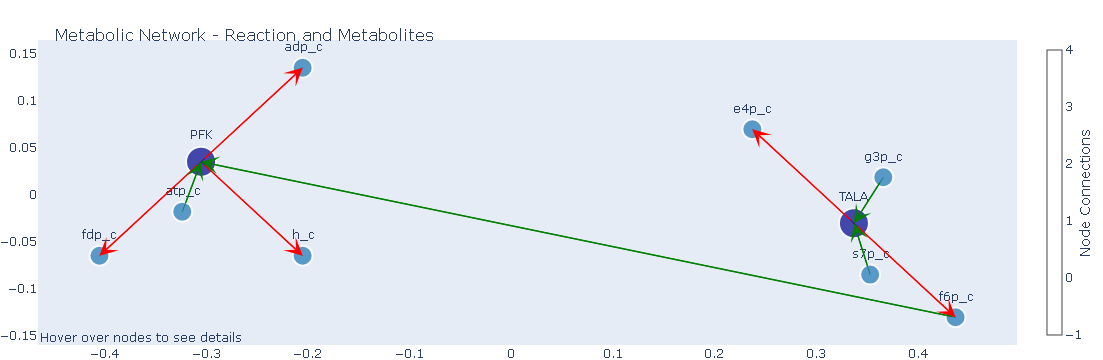

In [27]:
analyzer.plot_metabolic_network(metabolite_ids=["nh4_e"],gene_names=['pfkB'],reaction_ids=['TALA'])